# Milestone 1

Nama    : Muhammad Daffa  
Program : Full Time Data Science  
Batch   : BSD-007

As energy transition is becoming a trend in the last years. This project will be done to assess and analyze the existing renewable energy data to understand the market and able to give insight in formulating strategic decision for the future development

***Visualization URL*** : https://public.tableau.com/app/profile/muhammad.daffa6842/viz/GlobalRenewableEnergy_17224960318080/GlobalRenewableEnergyPopulation2000-2023?publish=yes

---

## PROBLEM STATEMENT

***Problem Statement***: Determining the best renewable energy source for future development by assessing the existing renewable energy data being used in 10 Countries inside the dataset in the range of year 2000 - 2023

1. What are the source types in renewable energy?

2. How is the percentage contribution / distribution by each of the source type in the overall dataset? (Provide visualization)

3. What energy source have the most installed capacity? (distribution visualization)

4. How is the installed capacity changing over time? (visualization)

5. Is the most installed capacity equal to generate more electricity? what energy source generate electricity the most? 

6. What would be the investment cost for each of the source type?

7. What is the average total investment cost in each energy type?

8. What is the projected ROI for each energy type?

9. Is the investment value for one type of energy source will be equal from across country? (hypothesis testing)




---

### Import Libraries and CSV

In [1]:
import pandas as pd             # importing library that will be needed
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import and reading the CSV Data
data = pd.read_csv('complete_renewable_energy_dataset.csv')

In [3]:
# Showing the imported data
data.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


---

## Data Loading

The problem statement and questions arise from the problem statement helps to understand and determine specific column that will be analyzed in the dataframe

*Query in SQL in the column selection process*
```
SELECT 
	country,
	year,
	energy_type,
	Production_GWh,
	Installed_Capacity_MW,
	Investments_USD,
	Renewable_Energy_Jobs,
	electricity_price
FROM table_main

```

After determining the specific column, load the column to a new dataframe

In [4]:
# Loading the column that want to be analyzed
df = data[['Country','Year', 'Energy Type','Installed Capacity (MW)', 'Production (GWh)', 'Investments (USD)', 'Renewable Energy Jobs', 'Electricity Prices']]
df

,Country,Year,Energy Type,Installed Capacity (MW),Production (GWh),Investments (USD),Renewable Energy Jobs,Electricity Prices
0,USA,2011,Solar,5549.794323,85404.690027,5.604125e+09,756878,0.149868
1,Australia,2008,Geothermal,43211.593798,22205.069382,6.361886e+08,945074,0.331144
2,Canada,2013,Biomass,6139.117212,94102.732038,6.158680e+09,588423,0.157541
3,Japan,2010,Biomass,40323.639260,88771.932910,8.526116e+09,11049,0.452971
4,China,2018,Solar,30755.403056,93288.408581,5.086237e+09,225191,0.058827
...,...,...,...,...,...,...,...,...
2495,Japan,2023,Solar,46650.085012,40091.199325,5.589553e+09,203477,0.088939
2496,Australia,2017,Hydro,28506.752159,9454.189177,5.602669e+09,692114,0.408497
2497,India,2022,Geothermal,22757.496947,94329.590380,8.590460e+09,430517,0.227620
2498,China,2000,Biomass,3530.005331,66206.311515,5.640793e+09,159323,0.497000


*Loading Data is successful*  

From the dataframe it can be concluded that the rows represent one project of renewable energy power generation.  
This is because the row are sharing the same value of country, year, and energy type. So, it is fine to assume that each rows representing one project for that particular energy type in the country and year

---

## Data Cleaning

Data cleaning to check the null, duplicated and data type will be performed

In [5]:
df.isnull().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2500 non-null   object 
 1   Year                     2500 non-null   int64  
 2   Energy Type              2500 non-null   object 
 3   Installed Capacity (MW)  2500 non-null   float64
 4   Production (GWh)         2500 non-null   float64
 5   Investments (USD)        2500 non-null   float64
 6   Renewable Energy Jobs    2500 non-null   int64  
 7   Electricity Prices       2500 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 156.4+ KB


All data type include in the dataframe is already correct for all numerical value and ready to be processed.

---

## Exploratory Data Analysis (EDA) & Statistics

As determined in our problem statement, we want to know which energy types are available in the dataframe

In [8]:
df['Energy Type'].unique()

array(['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro'], dtype=object)

There are ***5 energy source*** in the dataset.

How about the proportion of each energy source inside the dataset?

Total count: 2500
Percentage of Solar Energy: 20.44%
Percentage of Geothermal Energy: 20.4%
Percentage of Biomass Energy: 19.759999999999998%
Percentage of wind Energy: 19.88%
Percentage of Hydro Energy: 19.52%


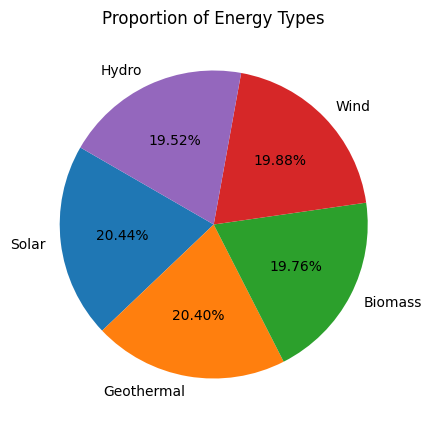

In [9]:
# Total dataset
total_count = len(df.index)
print(f"Total count: {total_count}")

# Calculate the count of each energy type
solar_count = len(df[df['Energy Type'] == 'Solar'])
geothermal_count =len(df[df['Energy Type'] == 'Geothermal'])
biomass_count = len(df[df['Energy Type'] == 'Biomass'])
wind_count = len(df[df['Energy Type'] == 'Wind'])
hydro_count = len(df[df['Energy Type'] == 'Hydro'])

# Calculate the proportion of each energy type
solar_proportion = print(f"Percentage of Solar Energy: {(solar_count/total_count)*100}%")
geothermal_proportion = print(f"Percentage of Geothermal Energy: {(geothermal_count/total_count)*100}%")
biomass_proportion = print(f"Percentage of Biomass Energy: {(biomass_count/total_count)*100}%")
wind_proportion = print(f"Percentage of wind Energy: {(wind_count/total_count)*100}%")
hydro_proportion = print(f"Percentage of Hydro Energy: {(hydro_count/total_count)*100}%")

energy_type = ['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro']
energy_proportion = [(solar_count/total_count)*100, (geothermal_count/total_count)*100, (biomass_count/total_count)*100, (wind_count/total_count)*100, (hydro_count/total_count)*100]

# Creating dataframe for proportion
proportion_df = pd.DataFrame({
    'Energy Types' : energy_type,
    'Proportion (%)': energy_proportion
})

# Plotting pie chart
plt.figure(figsize=(7, 5))
plt.pie(proportion_df['Proportion (%)'], labels=proportion_df['Energy Types'], autopct='%.2f%%', startangle=150)
plt.title('Proportion of Energy Types')
plt.show()

From the above analysis, all source types share ***similar value of proportion (19% - 20%)*** with **solar power having the highest percentage (20.44%)**. Thus, it can be concluded that solar have most amount of total project (power plant) inside the dataset

***We also required to check the installed capacity for each data source***  
Does having the most total amount of power plant project mean having the most installed capacity?

  Energy Types  Total Installed (MW)
0        Solar          1.238843e+07
1   Geothermal          1.265214e+07
2      Biomass          1.237640e+07
3         Wind          1.244558e+07
4        Hydro          1.234473e+07


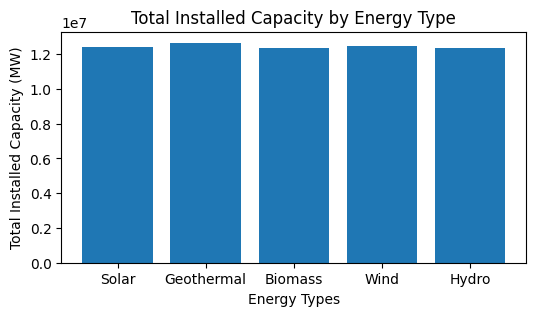

In [10]:
# Calculation to determine the total installed capacity by each energy source
installed_solar = df[df['Energy Type'] == 'Solar']['Installed Capacity (MW)'].sum()
installed_geothermal = df[df['Energy Type'] == 'Geothermal']['Installed Capacity (MW)'].sum()
installed_biomass = df[df['Energy Type'] == 'Biomass']['Installed Capacity (MW)'].sum()
installed_wind = df[df['Energy Type'] == 'Wind']['Installed Capacity (MW)'].sum()
installed_hydro = df[df['Energy Type'] == 'Hydro']['Installed Capacity (MW)'].sum()

# Creating installed capacity dataframe
installed__capacity_df = pd.DataFrame({
    'Energy Types' : energy_type,
    'Total Installed (MW)': [installed_solar, installed_geothermal, installed_biomass, installed_wind, installed_hydro]
})

print(installed__capacity_df)

# Plotting installed capacity in bar chart
plt.figure(figsize=(6, 3))
plt.bar(installed__capacity_df['Energy Types'], installed__capacity_df['Total Installed (MW)'])
plt.xlabel('Energy Types')
plt.ylabel('Total Installed Capacity (MW)')
plt.title('Total Installed Capacity by Energy Type')
plt.show()


Overall, the data also shows *similarity* in terms of the *total installed capacity*.

It is also important to note that the total installed capacity for the geothermal is the highest. This is a proof that having the most project / power plant does not mean having the most installed capacity (solar have the highest number of project/power plant).

*We also want to check the trend on the renewable energy project*  
What is the trend in terms of the installed capacity in every year?

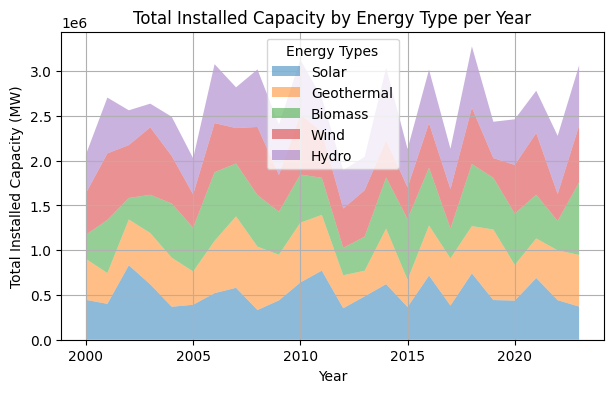

,Year,Solar,Geothermal,Biomass,Wind,Hydro
0,2000,445680.925681,457997.351926,268856.161370,464714.654758,432541.290928
1,2001,400910.588120,343988.986491,593295.189975,743655.527804,623681.013555
2,2002,832015.321439,511521.137793,240101.103556,590891.652470,388805.650708
3,2003,618709.562328,573181.915912,427277.660641,753952.858296,264491.894890
4,2004,368670.905202,548372.350662,605111.581717,530876.946451,438397.982081
5,2005,390887.852257,371840.095676,489148.725651,372788.903325,402950.461418
6,2006,520593.105138,583885.253151,767026.167152,548965.824707,658387.356259
7,2007,579982.310859,798474.710534,590833.188196,395508.083003,455349.131040
8,2008,331929.023071,708213.380731,575671.721819,761401.398588,642653.870804
9,2009,440118.839490,509570.642818,480235.693363,411363.078009,561440.050251


In [11]:
# Calculate each of the energy type grouped by year to show the total installed capacity in each year
yearly_solar_capacity = df[df['Energy Type'] == 'Solar'].groupby('Year')['Installed Capacity (MW)'].sum()
yearly_geothermal_capacity = df[df['Energy Type'] == 'Geothermal'].groupby('Year')['Installed Capacity (MW)'].sum()
yearly_biomass_capacity = df[df['Energy Type'] == 'Biomass'].groupby('Year')['Installed Capacity (MW)'].sum()
yearly_wind_capacity = df[df['Energy Type'] == 'Wind'].groupby('Year')['Installed Capacity (MW)'].sum()
yearly_hydro_capacity = df[df['Energy Type'] == 'Hydro'].groupby('Year')['Installed Capacity (MW)'].sum()


# Creating dataframe for yearly installed capacity
yearly_capacity_df = pd.DataFrame({
    'Year' : yearly_solar_capacity.index, #Index yearly solar capacity = the year

    # Only showing values from the aggregate calculation in each of the energy source column
    'Solar': yearly_solar_capacity.values, 
    'Geothermal': yearly_geothermal_capacity.values,
    'Biomass': yearly_biomass_capacity.values,
    'Wind': yearly_wind_capacity.values,
    'Hydro': yearly_hydro_capacity.values
    
})

# Plotting as an area line chart for better visualization
plt.figure(figsize=(7, 4))
plt.stackplot(yearly_capacity_df['Year'], # As the axis basis
              yearly_capacity_df['Solar'], # from this point forward is the plotted value to the year basis
              yearly_capacity_df['Geothermal'], 
              yearly_capacity_df['Biomass'], 
              yearly_capacity_df['Wind'], 
              yearly_capacity_df['Hydro'],
              labels=energy_type,
              alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Total Installed Capacity (MW)')
plt.title('Total Installed Capacity by Energy Type per Year')
plt.legend(title='Energy Types')
plt.grid(True)
plt.show()
yearly_capacity_df

Initiallly, we thought that there will be a point where renewable energy is becoming a trend since this is very political sensitive (e.g. Paris agreement etc)

However, from the data above, yearly installed capacity for all types of source have been **fluctutating over the years**. No turning point that determines the rising of the renewable energy.

It can be concluded that the **dataframe is not affected by the political or worldly event towards implementing the energy transition**.

***The next thing in our consideration is that we also required to know the capacity for each source to generate electricity***

Renewable energy is well known for its intermittent generation (not able to generate for 24 hours). Which types generate more electricity than the others?

  Energy Types  Total Installed (MW)
0        Solar          1.238843e+07
1   Geothermal          1.265214e+07
2      Biomass          1.237640e+07
3         Wind          1.244558e+07
4        Hydro          1.234473e+07


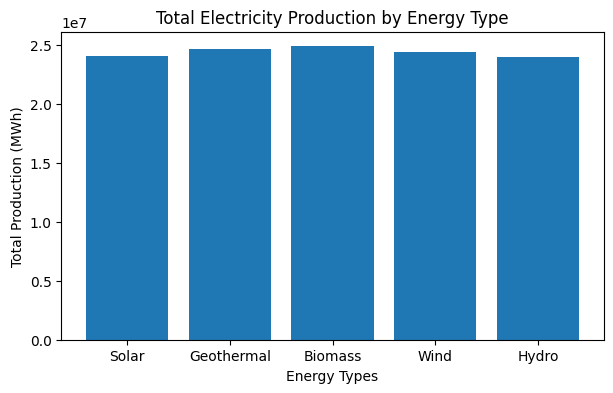

In [12]:
# Calculation to determine the total electricity generation by each energy source
production_solar = df[df['Energy Type'] == 'Solar']['Production (GWh)'].sum()
production_geothermal = df[df['Energy Type'] == 'Geothermal']['Production (GWh)'].sum()
production_biomass = df[df['Energy Type'] == 'Biomass']['Production (GWh)'].sum()
production_wind = df[df['Energy Type'] == 'Wind']['Production (GWh)'].sum()
production_hydro = df[df['Energy Type'] == 'Hydro']['Production (GWh)'].sum()

production_total_df = pd.DataFrame({
    'Energy Types' : energy_type,
    'Total production MWh': [production_solar, production_geothermal, production_biomass, production_wind, production_hydro]
})

print(installed__capacity_df)

# Plotting table for Electricity Production by all energy types
plt.figure(figsize=(7, 4))
plt.bar(production_total_df['Energy Types'], production_total_df['Total production MWh'])
plt.xlabel('Energy Types')
plt.ylabel('Total Production (MWh)')
plt.title('Total Electricity Production by Energy Type')
plt.show()

Information obtained from the analysis above:

Overall **biomass produces the most electricity**, however all types of energy source ***relatively produce similar amount of electricity***.

We initially believe that one type of source are able to generate more power overtime, but this calculation showing otherwise. It can be concluded that **relatively same ability to produce the electricity is shown in all energy source**

***Another important thing to consider is the investment cost***

After acquiring all of the above information, we also would like to know the invesment cost for all the energy source.  
The investment cost wil be standardize to the cost in investing per Mega Watt Peak (MWp) capacity installation

New column creation will provide the information for investment/MW Installation
```
Investment cost = Invesment (USD) / Installed Capacitiy (MW)
```

In [13]:
# Create new table
df['Investment/MW'] = df['Investments (USD)'] / df['Installed Capacity (MW)']

/var/folders/n0/87sxb7fx76v8vkq5_vy_tpn00000gn/T/ipykernel_57845/3001623331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Investment/MW'] = df['Investments (USD)'] / df['Installed Capacity (MW)']


Determine the Investment Cost per MW to all energy source

Text(0.5, 1.0, 'Average Invesment Cost/MWP for all energy source')

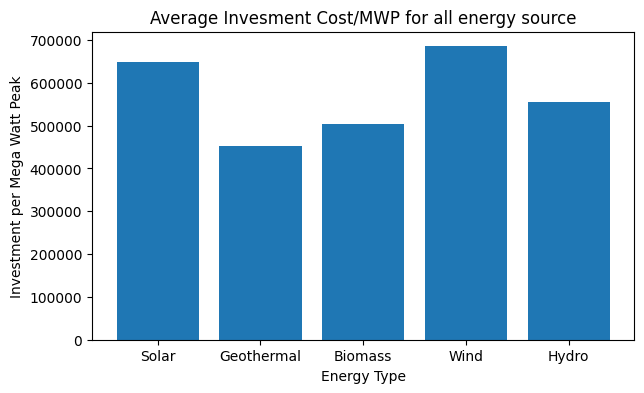

In [14]:
# Invesment Cost/Wp Calculation
investment_solar = df[df['Energy Type'] == 'Solar']['Investment/MW'].mean()
investment_geothermal = df[df['Energy Type'] == 'Geothermal']['Investment/MW'].mean()
investment_biomass = df[df['Energy Type'] == 'Biomass']['Investment/MW'].mean()
investment_wind = df[df['Energy Type'] == 'Wind']['Investment/MW'].mean()
investment_hydro = df[df['Energy Type'] == 'Hydro']['Investment/MW'].mean()

investment_avg_df = pd.DataFrame({
    'Energy Type' : energy_type,
    'Investment/Wp' : [investment_solar, investment_geothermal, investment_biomass, investment_wind, investment_hydro]
})

# Plotting table to show distribution in each energy source
plt.figure(figsize=(7, 4))
plt.bar(investment_avg_df['Energy Type'], investment_avg_df['Investment/Wp'])
plt.xlabel('Energy Type')
plt.ylabel('Investment per Mega Watt Peak')
plt.title('Average Invesment Cost/MWP for all energy source')

From the calculation above, *each type of energy source required different capital to be invested per MW installed capacity*.

**Wind power plant is the most expensive** in terms of investment per MWp installation, where **geothermal power plant is the cheapest** 

***What about the distribution of investment in each of the energy type?***

Before investing into one specific energy source, *knowing the market investment distribution is a crucial step to know the typical project value* of a certain energy source

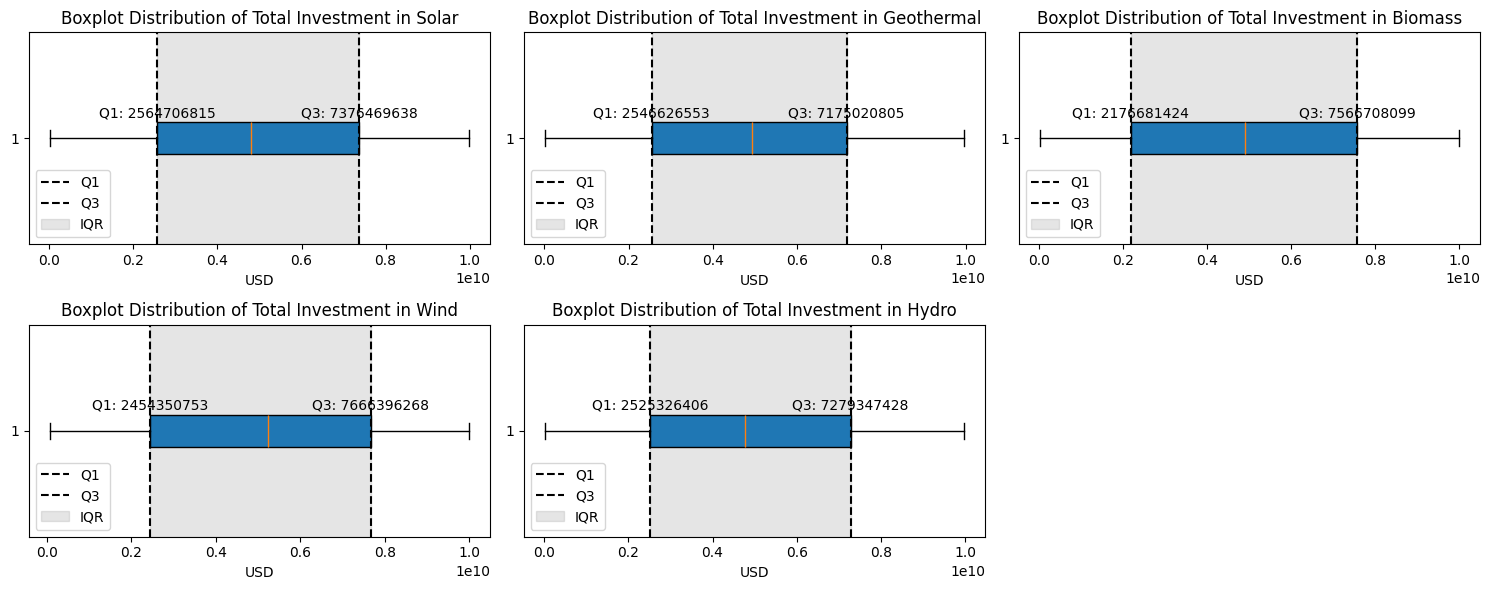

In [15]:
# Determine the Q1, Q2, Q3 and IQR
# Solar
q1_solar = df[df['Energy Type'] == 'Solar']['Investments (USD)'].quantile(0.25)
q2_solar = df[df['Energy Type'] == 'Solar']['Investments (USD)'].quantile(0.5)
q3_solar = df[df['Energy Type'] == 'Solar']['Investments (USD)'].quantile(0.75)
iqr_solar = q3_solar - q1_solar

# Geothermal
q1_Geothermal = df[df['Energy Type'] == 'Geothermal']['Investments (USD)'].quantile(0.25)
q2_Geothermal = df[df['Energy Type'] == 'Geothermal']['Investments (USD)'].quantile(0.5)
q3_Geothermal = df[df['Energy Type'] == 'Geothermal']['Investments (USD)'].quantile(0.75)
iqr_Geothermal = q3_Geothermal - q1_Geothermal

# Biomass
q1_Biomass = df[df['Energy Type'] == 'Biomass']['Investments (USD)'].quantile(0.25)
q2_Biomass = df[df['Energy Type'] == 'Biomass']['Investments (USD)'].quantile(0.5)
q3_Biomass = df[df['Energy Type'] == 'Biomass']['Investments (USD)'].quantile(0.75)
iqr_Biomass = q3_Biomass - q1_Biomass

# Wind
q1_Wind = df[df['Energy Type'] == 'Wind']['Investments (USD)'].quantile(0.25)
q2_Wind = df[df['Energy Type'] == 'Wind']['Investments (USD)'].quantile(0.5)
q3_Wind = df[df['Energy Type'] == 'Wind']['Investments (USD)'].quantile(0.75)
iqr_Wind = q3_Wind - q1_Wind

# Hydro
q1_Hydro = df[df['Energy Type'] == 'Hydro']['Investments (USD)'].quantile(0.25)
q2_Hydro = df[df['Energy Type'] == 'Hydro']['Investments (USD)'].quantile(0.5)
q3_Hydro = df[df['Energy Type'] == 'Hydro']['Investments (USD)'].quantile(0.75)
iqr_Hydro = q3_Hydro - q1_Hydro


# Create a combined figure for 5 boxplot table
plt.figure(figsize=(15, 6))

# Subplot 1: Solar
plt.subplot(2, 3, 1)  # (rows, columns, panel number)
plt.boxplot(df[df['Energy Type'] == 'Solar']['Investments (USD)'], vert=False, patch_artist=True)
plt.axvline(q1_solar, linestyle='--', color='black', label='Q1')
plt.axvline(q3_solar, linestyle='--', color='black', label='Q3')
plt.axvspan(q1_solar, q3_solar, alpha=0.2, color='gray', label='IQR')
plt.xlabel('USD')
plt.title('Boxplot Distribution of Total Investment in Solar')
plt.legend()
plt.text(q1_solar, 1.1, f'Q1: {q1_solar:.0f}', horizontalalignment='center', color='black')
plt.text(q3_solar, 1.1, f'Q3: {q3_solar:.0f}', horizontalalignment='center', color='black')

# Subplot 2: Geothermal
plt.subplot(2, 3, 2)
plt.boxplot(df[df['Energy Type'] == 'Geothermal']['Investments (USD)'], vert=False, patch_artist=True)
plt.axvline(q1_Geothermal, linestyle='--', color='black', label='Q1')
plt.axvline(q3_Geothermal, linestyle='--', color='black', label='Q3')
plt.axvspan(q1_Geothermal, q3_Geothermal, alpha=0.2, color='gray', label='IQR')
plt.xlabel('USD')
plt.title('Boxplot Distribution of Total Investment in Geothermal')
plt.legend()
plt.text(q1_Geothermal, 1.1, f'Q1: {q1_Geothermal:.0f}', horizontalalignment='center', color='black')
plt.text(q3_Geothermal, 1.1, f'Q3: {q3_Geothermal:.0f}', horizontalalignment='center', color='black')

# Subplot 3: Biomass
plt.subplot(2, 3, 3)
plt.boxplot(df[df['Energy Type'] == 'Biomass']['Investments (USD)'], vert=False, patch_artist=True)
plt.axvline(q1_Biomass, linestyle='--', color='black', label='Q1')
plt.axvline(q3_Biomass, linestyle='--', color='black', label='Q3')
plt.axvspan(q1_Biomass, q3_Biomass, alpha=0.2, color='gray', label='IQR')
plt.xlabel('USD')
plt.title('Boxplot Distribution of Total Investment in Biomass')
plt.legend()
plt.text(q1_Biomass, 1.1, f'Q1: {q1_Biomass:.0f}', horizontalalignment='center', color='black')
plt.text(q3_Biomass, 1.1, f'Q3: {q3_Biomass:.0f}', horizontalalignment='center', color='black')

# Subplot 4: Wind
plt.subplot(2, 3, 4)
plt.boxplot(df[df['Energy Type'] == 'Wind']['Investments (USD)'], vert=False, patch_artist=True)
plt.axvline(q1_Wind, linestyle='--', color='black', label='Q1')
plt.axvline(q3_Wind, linestyle='--', color='black', label='Q3')
plt.axvspan(q1_Wind, q3_Wind, alpha=0.2, color='gray', label='IQR')
plt.xlabel('USD')
plt.title('Boxplot Distribution of Total Investment in Wind')
plt.legend()
plt.text(q1_Wind, 1.1, f'Q1: {q1_Wind:.0f}', horizontalalignment='center', color='black')
plt.text(q3_Wind, 1.1, f'Q3: {q3_Wind:.0f}', horizontalalignment='center', color='black')

# Subplot 5: Hydro
plt.subplot(2, 3, 5)
plt.boxplot(df[df['Energy Type'] == 'Hydro']['Investments (USD)'], vert=False, patch_artist=True)
plt.axvline(q1_Hydro, linestyle='--', color='black', label='Q1')
plt.axvline(q3_Hydro, linestyle='--', color='black', label='Q3')
plt.axvspan(q1_Hydro, q3_Hydro, alpha=0.2, color='gray', label='IQR')
plt.xlabel('USD')
plt.title('Boxplot Distribution of Total Investment in Hydro')
plt.legend()
plt.text(q1_Hydro, 1.1, f'Q1: {q1_Hydro:.0f}', horizontalalignment='center', color='black')
plt.text(q3_Hydro, 1.1, f'Q3: {q3_Hydro:.0f}', horizontalalignment='center', color='black')


plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

from the table above, **investment distribution for each of the energy source are sharing relatively similar value**. The IQR range is at around 2,5 Million USD to 7.5 Million USD. It can be concluded that the money distributed / project value for all energy type are sharing the similar value

***Determine the ROI for each energy source***

Calculation of Gross Revenue is required to analyze the expected ROI

```
Gross revenue = Electricity Price * (Electricity Generation * 1000000)

ROI = (gross revenue - O&M - Investment) / Investment
```
Assumption: 
1. Electricity price is the price / KWp  
2. O&M Cost = 35% Gross Revenue

/var/folders/n0/87sxb7fx76v8vkq5_vy_tpn00000gn/T/ipykernel_57845/187881051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gross Revenue'] = df['Electricity Prices'] * df['Production (GWh)'] * 1000000 # Electricity price / kwh
/var/folders/n0/87sxb7fx76v8vkq5_vy_tpn00000gn/T/ipykernel_57845/187881051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = ((df['Gross Revenue'] - (df['Gross Revenue'] * 35 / 100) - df['Investments (USD)']) / df['Investments (USD)']) * 100


<Axes: title={'center': 'ROI Projection for All Data Source'}, xlabel='Energy Type', ylabel='ROI (%)'>

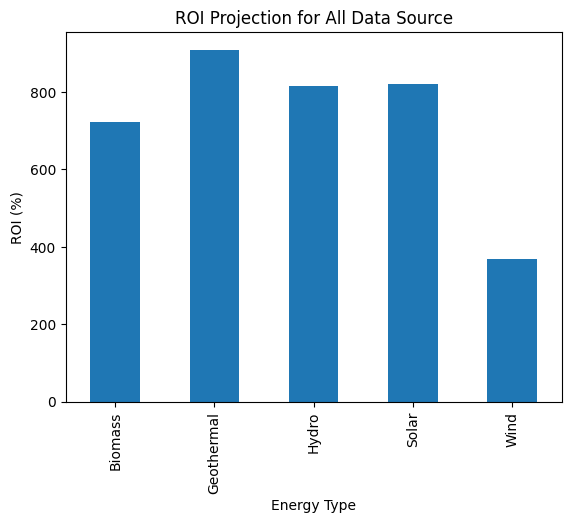

In [16]:
# Create new column for gross revenue
df['Gross Revenue'] = df['Electricity Prices'] * df['Production (GWh)'] * 1000000 # Electricity price / kwh

# New Column for ROI Calculation
df['ROI'] = ((df['Gross Revenue'] - (df['Gross Revenue'] * 35 / 100) - df['Investments (USD)']) / df['Investments (USD)']) * 100

#Plot ROI in the table
energy_ROI = df.groupby("Energy Type")['ROI'].mean()
energy_ROI.plot(kind='bar', ylabel= 'ROI (%)', title='ROI Projection for All Data Source')


from the ROI calculation, it can be can concluded that each of energy source may produce varies number of expected ROI, where ***Geothermal have the highest ROI and Wind with the lowest ROI.***

**Two Independent Sample Testing**

We also want to know does investing one of the energy sources in different country will have different capital requriement?

Two independent test in investing Solar Energy in Australia and in USA will be conducted with the hypothesis:

H0: Invest Solar in USA == Invest Solar in Australia  
H:1 Invest Solar in USA != Invest Solar in Australia

Confidence level = 95%

In [17]:
# Determine the distribution of investment for solar energy source in USA and Australia
investment_USA = df[(df['Country'] == 'USA') & (df['Energy Type'] == 'Solar')]['Investments (USD)']
investment_Aus = df[(df['Country'] == 'Australia') & (df['Energy Type'] == 'Solar')]['Investments (USD)']

# T val and p-val calculation
t_stat, p_val = stats.ttest_ind(investment_USA, investment_Aus)
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -0.8792840011739934
P-value: 0.38146602079542413


Based on the p-value calculation, we are failed to reject the H0. Thus, investing same energy source in every country will have similar capital requirement

In [18]:
# Export dataframe for further visualization in tableau
df.to_csv('df_re_out1.csv', index = False)

---

## Conclusion

An analysis have been conducted based on the existing renewable energy data that is being used in 10 Countries in the range of year 2000 - 2023.  

From the anaysis, it can be concluded:

1. There are **5 types of energy source**: Solar, Geothermal, Biomass, Wind, and Hydro

2. **All the energy types share the similar value in terms of the proportions of the total project**. Inside the dataset, Solar is ranked first in terms of total project with 20.44% overall proportions.

3. Having the most quantity of project/power plant does not necessariliy mean having the most installed capacity and generate more electricity.

4. Both **installed capacity and accumulation of electricity generation** by all energy source are **sharing the relatively similar value**

5. Within the dataset, the **most installed capacity is coming from geothermal source**. However, **Biomass produces most electricity generation**.

6. The **distribution (IQR range) for invesment value** in all the energy source is also showing similar trend, which is at around **2.5 Billion USD - 7.5 Billion USD.**

7. From the trend analysis, it is shown that the **capacity being installed every year from 2000 - 2023 is fluctuating without any specific turning point**. No event such as paris agreement and other political event cause an impact within the analyzed data in the dataset

8. **The cost for invesment per MW installation is varying for all energy source**, where geothermal is being the cheapest and wind is the most expensive

9. Initial ROI Projection is also performed and the value is varying depending the energy source type. **The highest ROI percentage is coming from geothermal source. On the other hand, wind is having the lowest ROI expectation**.

10. Inferential analysis to check if the investment of solar source from one country is different from the other is performed. It is proven that **no difference in capital investment is required to invest in different countries.**

***NEXT STEP***  

The future development can be more focused on the development to the energy source that is having the most highest ROI projection and lowest investment cost /MWP installation. From the anaylsis above, we are strongly suggesting to invest more in ***Geothermal Energy*** source for that consideration